In [1]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0, n_classes=2,
                           n_clusters_per_class=1, random_state=41, hypercube=False, class_sep=10)

In [2]:
import matplotlib.pyplot as plt

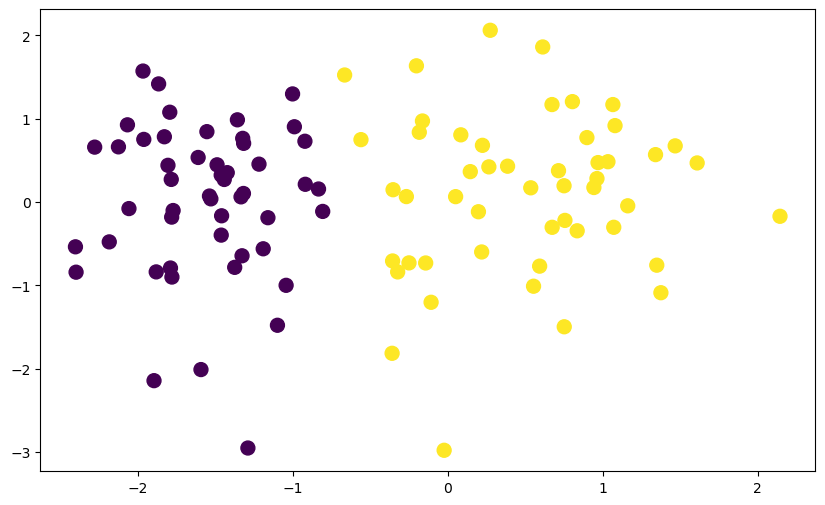

In [3]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:, 1],c=y,s=100)
plt.show()

In [4]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=39)

In [5]:
from sklearn.linear_model import Perceptron
clf = Perceptron(alpha=0.01)
clf.fit(X_train, y_train)

Perceptron(alpha=0.01)

In [6]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [7]:
clf.coef_

array([[4.77110113, 0.58775741]])

In [8]:
clf.intercept_

array([3.])

In [9]:
def pos_or_neg(z):
    return 1 if z > 0 else 0

class MyPerceptron:
    def __init__(self, epoch=1000, learning_rate=0.01):
        self.coef_ = None
        self.intercept_ = None
        self.epoch = epoch
        self.learning_rate = learning_rate
        
    def fit(self, X_train, y_train):
        X_train = np.insert(X_train,0,1,axis=1)   
        omegas = np.ones(X_train.shape[1])       

        for i in range(self.epoch):
            idx = np.random.randint(0, X_train.shape[0])
            y_hat = pos_or_neg(np.dot(X_train[idx], omegas))
            omegas = omegas + self.learning_rate * (y_train[idx] - y_hat) * X_train[idx]

        self.intercept_ = omegas[0]
        self.coef_ = omegas[1:]

    def predict(self, X_test):
        X_test = np.insert(X_test, 0, 1, axis=1)
        return np.array([pos_or_neg(np.dot(x, np.insert(self.coef_, 0, self.intercept_))) 
                         for x in X_test])

In [10]:
clf = MyPerceptron()
clf.fit(X_train, y_train)

In [11]:
intercept_ = clf.intercept_
intercept_

np.float64(0.8599999999999999)

In [12]:
coef_ = clf.coef_
coef_

array([1.32395576, 0.29677687])

In [13]:
y_pred = clf.predict(X_test)

In [14]:
accuracy_score(y_test, y_pred)

0.95

In [15]:
m = -(coef_[0]/coef_[1])
b = -(coef_[0]/intercept_)

In [16]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

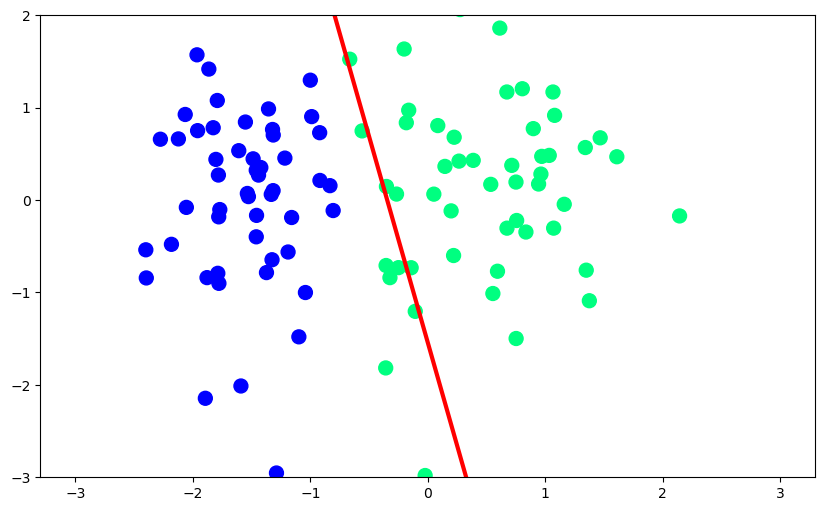

In [17]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [18]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

class MyPerceptron_Sigmoid:
    def __init__(self, epoch=1000, learning_rate=0.01):
        self.coef_ = None
        self.intercept_ = None
        self.epoch = epoch
        self.learning_rate = learning_rate
        
    def fit(self, X_train, y_train):
        X_train = np.insert(X_train,0,1,axis=1)   
        omegas = np.ones(X_train.shape[1])       

        for i in range(self.epoch):
            idx = np.random.randint(0, X_train.shape[0])
            y_hat = sigmoid(np.dot(X_train[idx], omegas))
            omegas = omegas + self.learning_rate * (y_train[idx] - y_hat) * X_train[idx]

        self.intercept_ = omegas[0]
        self.coef_ = omegas[1:]

    def predict(self, X_test):
        X_test = np.insert(X_test, 0, 1, axis=1)
        return np.array([pos_or_neg(np.dot(x, np.insert(self.coef_, 0, self.intercept_))) 
                         for x in X_test])

In [19]:
clf1 = MyPerceptron_Sigmoid()
clf1.fit(X_train, y_train)

In [20]:
coef_1 = clf1.coef_
intercept_1 = clf1.intercept_

In [21]:
m1 = -(coef_1[0]/coef_1[1])
b1 = -(coef_1[0]/intercept_1)

In [22]:
x1_input = np.linspace(-3,3,100)
y1_input = m1 * x1_input + b1

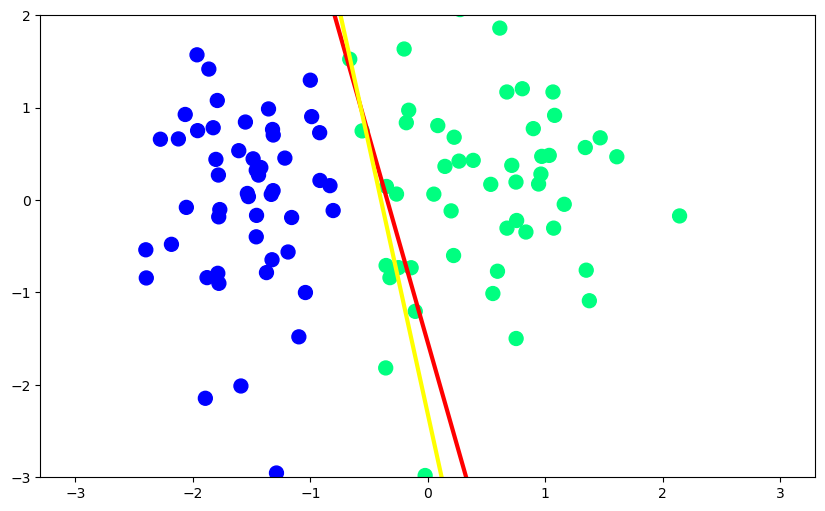

In [23]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,c='red', linewidth=3)
plt.plot(x1_input,y1_input,c='yellow', linewidth=3)
plt.scatter(X[:,0], X[:,1], c=y, cmap='winter',s=100)
plt.ylim(-3,2)
plt.show()

In [24]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(X_train,y_train)

LogisticRegression()

In [25]:
y_pred = lor.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [26]:
lor.coef_

array([[3.25734912, 0.10648028]])

In [27]:
m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_[0]/lor.coef_[0][1])

In [28]:
x2_input = np.linspace(-3,3,100)
y2_input = m*x_input + b

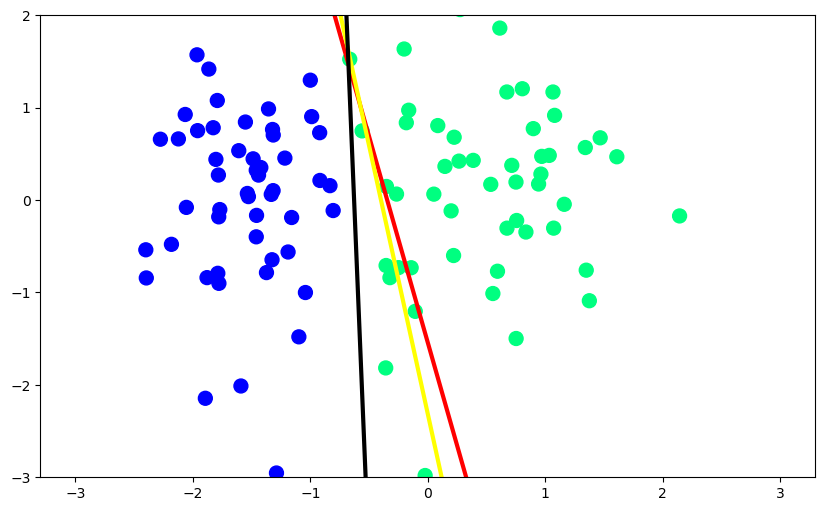

In [29]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x1_input,y1_input,c='yellow', linewidth=3)
plt.plot(x2_input,y2_input,color='black',linewidth=3)
plt.ylim(-3,2)
plt.show()